In [33]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import regression models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, log_loss, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [128]:
sns.set(style="ticks", color_codes=True)

In [8]:
data = pd.read_csv('/Users/vasanthakumarthirugnanam/Desktop/Python/Data/health_data.csv',delimiter = ',')

In [9]:
data.head()

,Start,Finish,Active Calories (kcal),Distance (mi),Heart Rate (count/min),Steps (count)
0,17-Jan-2016 14:00,17-Jan-2016 15:00,0.0,0.334385,0.0,746.000000
1,17-Jan-2016 15:00,17-Jan-2016 16:00,0.0,0.126767,0.0,268.793695
2,17-Jan-2016 16:00,17-Jan-2016 17:00,0.0,0.185255,0.0,364.206305
3,17-Jan-2016 17:00,17-Jan-2016 18:00,0.0,0.039967,0.0,77.000000
4,17-Jan-2016 18:00,17-Jan-2016 19:00,0.0,0.121938,0.0,211.000000


In [10]:
data.columns = data.columns.str.lower()

In [11]:
data.head()

,start,finish,active calories (kcal),distance (mi),heart rate (count/min),steps (count)
0,17-Jan-2016 14:00,17-Jan-2016 15:00,0.0,0.334385,0.0,746.000000
1,17-Jan-2016 15:00,17-Jan-2016 16:00,0.0,0.126767,0.0,268.793695
2,17-Jan-2016 16:00,17-Jan-2016 17:00,0.0,0.185255,0.0,364.206305
3,17-Jan-2016 17:00,17-Jan-2016 18:00,0.0,0.039967,0.0,77.000000
4,17-Jan-2016 18:00,17-Jan-2016 19:00,0.0,0.121938,0.0,211.000000


In [12]:
data.columns = data.columns.str.replace("(","_").str.replace(" ","_").str.replace(")","")
data.columns

Index(['start', 'finish', 'active_calories__kcal', 'distance__mi',
       'heart_rate__count/min', 'steps__count'],
      dtype='object')

In [13]:
data.columns = data.columns.str.replace("/","_").str.replace("__","_")

In [14]:
data.columns

Index(['start', 'finish', 'active_calories_kcal', 'distance_mi',
       'heart_rate_count_min', 'steps_count'],
      dtype='object')

In [15]:
data.head()

,start,finish,active_calories_kcal,distance_mi,heart_rate_count_min,steps_count
0,17-Jan-2016 14:00,17-Jan-2016 15:00,0.0,0.334385,0.0,746.000000
1,17-Jan-2016 15:00,17-Jan-2016 16:00,0.0,0.126767,0.0,268.793695
2,17-Jan-2016 16:00,17-Jan-2016 17:00,0.0,0.185255,0.0,364.206305
3,17-Jan-2016 17:00,17-Jan-2016 18:00,0.0,0.039967,0.0,77.000000
4,17-Jan-2016 18:00,17-Jan-2016 19:00,0.0,0.121938,0.0,211.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24896 entries, 0 to 24895
Data columns (total 6 columns):
start                   24896 non-null object
finish                  24896 non-null object
active_calories_kcal    24896 non-null float64
distance_mi             24896 non-null float64
heart_rate_count_min    24896 non-null float64
steps_count             24896 non-null float64
dtypes: float64(4), object(2)
memory usage: 1.1+ MB


In [17]:
data['start'] = pd.to_datetime(data['start'])

In [18]:
data['finish'] = pd.to_datetime(data['finish'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24896 entries, 0 to 24895
Data columns (total 6 columns):
start                   24896 non-null datetime64[ns]
finish                  24896 non-null datetime64[ns]
active_calories_kcal    24896 non-null float64
distance_mi             24896 non-null float64
heart_rate_count_min    24896 non-null float64
steps_count             24896 non-null float64
dtypes: datetime64[ns](2), float64(4)
memory usage: 1.1 MB


In [20]:
data.head()

,start,finish,active_calories_kcal,distance_mi,heart_rate_count_min,steps_count
0,2016-01-17 14:00:00,2016-01-17 15:00:00,0.0,0.334385,0.0,746.000000
1,2016-01-17 15:00:00,2016-01-17 16:00:00,0.0,0.126767,0.0,268.793695
2,2016-01-17 16:00:00,2016-01-17 17:00:00,0.0,0.185255,0.0,364.206305
3,2016-01-17 17:00:00,2016-01-17 18:00:00,0.0,0.039967,0.0,77.000000
4,2016-01-17 18:00:00,2016-01-17 19:00:00,0.0,0.121938,0.0,211.000000


In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
active_calories_kcal,24896.0,15.020148,29.642595,0.0,0.0,7.649074,22.482016,619.709895
distance_mi,24896.0,0.116127,0.210596,0.0,0.0,0.040459,0.153373,4.951592
heart_rate_count_min,24896.0,49.099081,43.428400,0.0,0.0,73.000000,85.000000,201.000000
steps_count,24896.0,272.195968,489.516383,0.0,0.0,87.000000,361.915334,7104.928983


In [61]:
data.start[0].date() 

datetime.date(2016, 1, 17)

In [38]:
ts

datetime.datetime(2018, 12, 4, 22, 43, 32, 733233)

In [28]:
data[data.start.year() == '2016']

AttributeError: 'Series' object has no attribute 'year'

In [97]:


data.start.dt.date == data.start[0].date()

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
24866    False
24867    False
24868    False
24869    False
24870    False
24871    False
24872    False
24873    False
24874    False
24875    False
24876    False
24877    False
24878    False
24879    False
24880    False
24881    False
24882    False
24883    False
24884    False
24885    False
24886    False
24887    False
24888    False
24889    False
24890    False
24891    False
24892    False
24893    False
24894    False
24895    False
Name: start, Length: 24896, dtype: bool

In [115]:
data.start[2004]

Timestamp('2016-04-10 03:00:00')

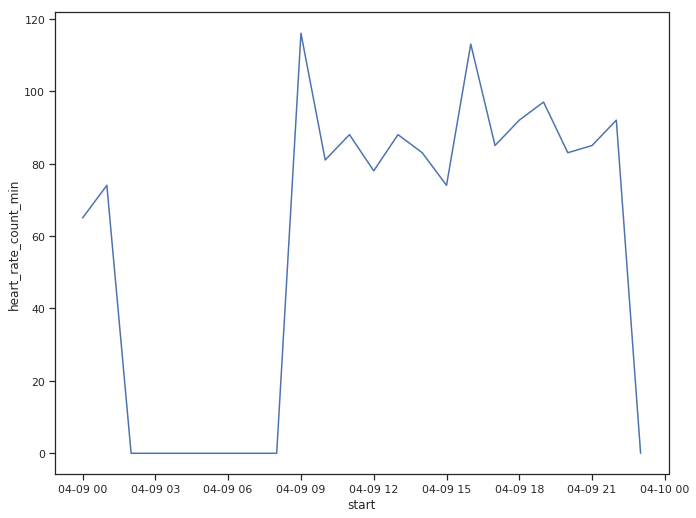

In [129]:
plt.figure(figsize=(11,8.5))
sns.lineplot(data[data.start.dt.date == data.start[2000].date()]['start'],(data[data.start.dt.date == data.start[2000].date()]['heart_rate_count_min']))

In [116]:
data[data.heart_rate_count_min == 0].count()

start                   10496
finish                  10496
active_calories_kcal    10496
distance_mi             10496
heart_rate_count_min    10496
steps_count             10496
dtype: int64

In [152]:
class hr_classifier:
    def __init__(self,hr_value):
        
        self.hr_value = hr_value
    
    def hr_classify(hr_value):
        if hr_value == 0:
            return f'None'
        elif hr_value > 120:
            return f'Tachy'
        elif hr_value < 40:
            return f'Brady'
        
        else:
            return f'Normal'
            
        
        
    

In [194]:
class act_classifier:
    def __init__(self,steps):
        
        self.steps = steps
    
    def act_classify(steps):
        if steps == 0:
            return f'None'
        elif steps < 272:
            return f'Low'
        elif (steps >= 272) & (steps <= 1000):
            return f'medium'
        else:
            return f'high'

In [195]:
act_c = act_classifier

In [199]:
act_c.act_classify(data.steps_count[0])

'medium'

In [153]:
hr_c = hr_classifier

In [150]:
len(data.heart_rate_count_min)

24896

In [156]:
hr_c.hr_classify(data.heart_rate_count_min[0])

'None'

In [157]:
data['classifier'] = 0

In [162]:
for i in range(0,len(data.heart_rate_count_min)):
    data['classifier'][i] = hr_c.hr_classify(data.heart_rate_count_min[i])
    

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


KeyboardInterrupt: 

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24896 entries, 0 to 24895
Data columns (total 7 columns):
start                   24896 non-null datetime64[ns]
finish                  24896 non-null datetime64[ns]
active_calories_kcal    24896 non-null float64
distance_mi             24896 non-null float64
heart_rate_count_min    24896 non-null float64
steps_count             24896 non-null float64
classifier              24896 non-null object
dtypes: datetime64[ns](2), float64(4), object(1)
memory usage: 1.3+ MB


In [161]:
data.classifier.value_counts()

0         22791
None       1684
Normal      411
Tachy        10
Name: classifier, dtype: int64

In [164]:
data.classifier.value_counts()

0         12788
Normal     6073
None       5914
Tachy       121
Name: classifier, dtype: int64

In [165]:
hr_c.hr_classify

<function __main__.hr_classifier.hr_classify(hr_value)>

In [166]:
data['classifier'] = data.heart_rate_count_min.apply(hr_c.hr_classify)

In [167]:
data.classifier.value_counts()

Normal    14009
None      10496
Tachy       391
Name: classifier, dtype: int64

In [200]:
data['activity_level'] = data.steps_count.apply(act_c.act_classify)

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24896 entries, 0 to 24895
Data columns (total 8 columns):
start                   24896 non-null datetime64[ns]
finish                  24896 non-null datetime64[ns]
active_calories_kcal    24896 non-null float64
distance_mi             24896 non-null float64
heart_rate_count_min    24896 non-null float64
steps_count             24896 non-null float64
classifier              24896 non-null object
activity_level          24896 non-null object
dtypes: datetime64[ns](2), float64(4), object(2)
memory usage: 1.5+ MB


In [202]:
data.head()

,start,finish,active_calories_kcal,distance_mi,heart_rate_count_min,steps_count,classifier,activity_level
0,2016-01-17 14:00:00,2016-01-17 15:00:00,0.0,0.334385,0.0,746.000000,None,medium
1,2016-01-17 15:00:00,2016-01-17 16:00:00,0.0,0.126767,0.0,268.793695,None,Low
2,2016-01-17 16:00:00,2016-01-17 17:00:00,0.0,0.185255,0.0,364.206305,None,medium
3,2016-01-17 17:00:00,2016-01-17 18:00:00,0.0,0.039967,0.0,77.000000,None,Low
4,2016-01-17 18:00:00,2016-01-17 19:00:00,0.0,0.121938,0.0,211.000000,None,Low


In [205]:
data[data.classifier == 'Tachy'].activity_level.value_counts()

high      251
medium    106
Low        31
None        3
Name: activity_level, dtype: int64

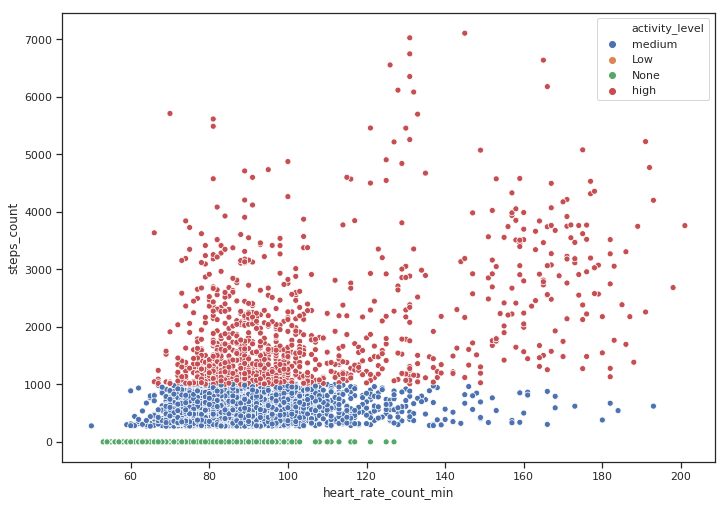

In [233]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(x = data[((data.heart_rate_count_min > 0) & (data.activity_level != 'Low'))].heart_rate_count_min,y= data.steps_count,hue = data.activity_level)

In [209]:
dat_corr = data.corr()

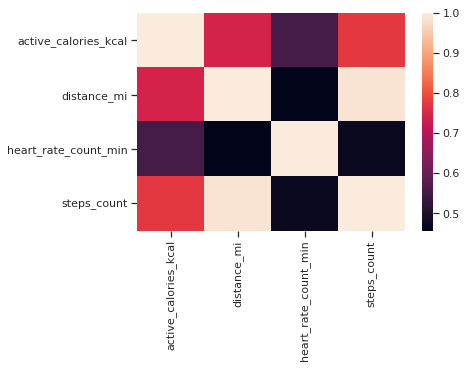

In [210]:
sns.heatmap(dat_corr)

In [212]:
data.groupby('activity_level')['heart_rate_count_min'].mean().round(2)

activity_level
Low       53.76
None      10.08
high      94.14
medium    79.68
Name: heart_rate_count_min, dtype: float64

In [219]:
data_nz_hr = data[data.heart_rate_count_min >0]

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24896 entries, 0 to 24895
Data columns (total 8 columns):
start                   24896 non-null datetime64[ns]
finish                  24896 non-null datetime64[ns]
active_calories_kcal    24896 non-null float64
distance_mi             24896 non-null float64
heart_rate_count_min    24896 non-null float64
steps_count             24896 non-null float64
classifier              24896 non-null object
activity_level          24896 non-null object
dtypes: datetime64[ns](2), float64(4), object(2)
memory usage: 1.5+ MB


In [221]:
data_nz_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14400 entries, 1533 to 24895
Data columns (total 8 columns):
start                   14400 non-null datetime64[ns]
finish                  14400 non-null datetime64[ns]
active_calories_kcal    14400 non-null float64
distance_mi             14400 non-null float64
heart_rate_count_min    14400 non-null float64
steps_count             14400 non-null float64
classifier              14400 non-null object
activity_level          14400 non-null object
dtypes: datetime64[ns](2), float64(4), object(2)
memory usage: 1012.5+ KB


In [229]:
data_nz_hr.groupby('activity_level')['heart_rate_count_min'].agg(['mean','min','max']).round(2)

,mean,min,max
activity_level,,,
Low,81.20,51.0,174.0
None,74.75,53.0,127.0
high,101.92,66.0,201.0
medium,86.82,50.0,193.0


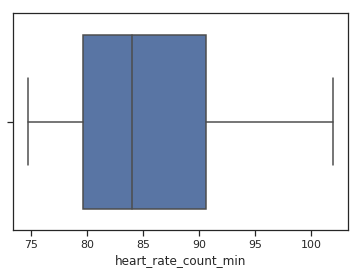

In [230]:
sns.boxplot(data_nz_hr.groupby('activity_level')['heart_rate_count_min'].mean().round(2))

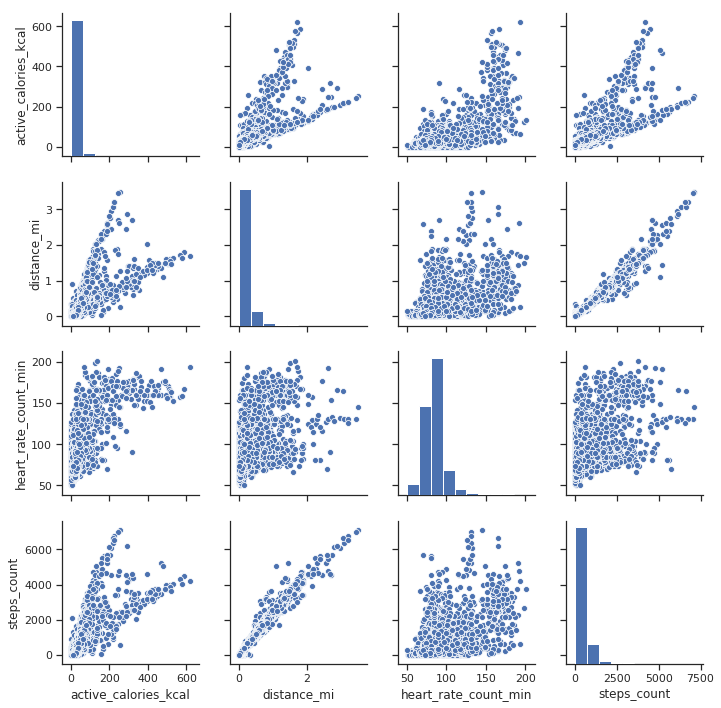

In [231]:
sns.pairplot(data_nz_hr)